<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/latihan_Text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('indonesian')
except LookupError:
    nltk.download('stopwords')


# URL of the CSV file
csv_url = 'https://raw.githubusercontent.com/anmedsos/sentiment_analysis/refs/heads/main/Sentiment_Rupiah/sentimen_rupiah.csv'

# Load the CSV into a pandas DataFrame
try:
    df = pd.read_csv(csv_url)
    print("Data loaded successfully.")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")


Data loaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,sentiment,date,name,tweet,location
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur"
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia"


Now, let's preprocess the text data and generate the word cloud. I will look for a column that likely contains the text data, such as 'sentimen', 'text', or 'ulasan'. If you know the exact column name, please specify it.

Using column 'tweet' for text data.


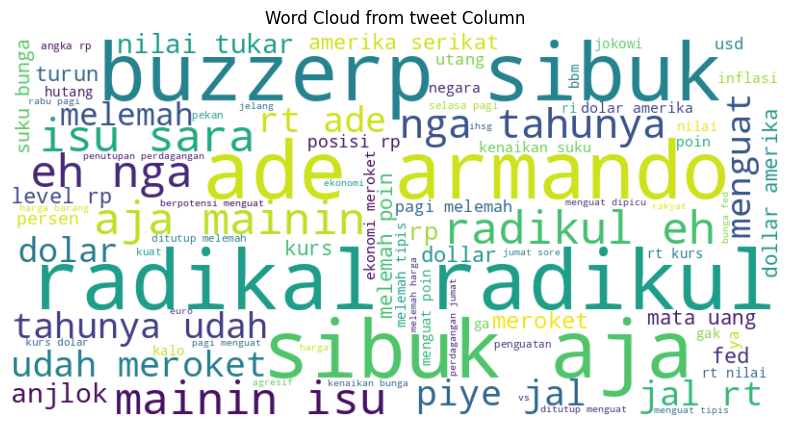

In [ ]:
# Identify the text column
text_column = None
possible_text_columns = ['tweet']

for col in possible_text_columns:
    if col in df.columns:
        text_column = col
        break

if text_column is None:
    print("Could not find a suitable text column. Please specify the column name containing the text data.")
else:
    print(f"Using column '{text_column}' for text data.")
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].dropna().astype(str))

    # Text preprocessing function
    def preprocess_text(text):
        text = text.lower() # Convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
        text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
        text = re.sub(r'#\w+', '', text) # Remove hashtags
        text = re.sub(r'[\d]+', '', text) # Remove numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters
        return text

    cleaned_text = preprocess_text(all_text)

    # Get Indonesian stop words
    indonesian_stopwords = stopwords.words('indonesian')

    # Add common English stop words as well, if needed, or other domain-specific words
    custom_stopwords = set(STOPWORDS) # English stopwords
    custom_stopwords.update(indonesian_stopwords)
    custom_stopwords.update(['rupiah', 'indonesia', 'nya', 'yg', 'ini', 'itu', 'di', 'dan', 'yang', 'dengan'])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        min_font_size=10
    ).generate(cleaned_text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud from {text_column} Column')
    plt.show()


# Task
Prepare the 'tweet' column as features and the 'sentiment' column as the target variable, including text preprocessing (cleaning, tokenization) for 'tweet' data and encoding the 'sentiment' labels.

## Prepare Data for Classification

### Subtask:
Prepare the 'tweet' column as features and the 'sentiment' column as the target variable. This includes text preprocessing (cleaning, tokenization, stopword removal) for the 'tweet' data and encoding the 'sentiment' labels.


**Reasoning**:
First, I will define a function to clean, tokenize, and remove stopwords from the text data, as specified in the instructions. This function will be crucial for preparing the 'tweet' column for machine learning.



In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def preprocess_for_classification(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[\d]+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters

    tokens = word_tokenize(text) # Tokenize text
    # Remove stopwords (using the custom_stopwords defined previously)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet_text'] = df[text_column].dropna().apply(preprocess_for_classification)

print("Text preprocessing completed and 'cleaned_tweet_text' column created.")

Text preprocessing completed and 'cleaned_tweet_text' column created.


**Reasoning**:
The previous cell failed because the `punkt_tab` NLTK resource was not downloaded. I will explicitly download it before using `word_tokenize` and then proceed with the text preprocessing and sentiment label encoding as per the task instructions.



In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk

# Ensure NLTK resources are downloaded explicitly
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def preprocess_for_classification(text):
    text = str(text) # Ensure text is string type to avoid errors with non-string entries
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[\d]+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters

    tokens = word_tokenize(text) # Tokenize text
    # Remove stopwords (using the custom_stopwords defined previously)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet_text'] = df[text_column].dropna().apply(preprocess_for_classification)

print("Text preprocessing completed and 'cleaned_tweet_text' column created.")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

print("Sentiment labels encoded and 'sentiment_encoded' column created.")
display(df.head())

Text preprocessing completed and 'cleaned_tweet_text' column created.
Sentiment labels encoded and 'sentiment_encoded' column created.


,ID,sentiment,date,name,tweet,location,cleaned_tweet_text,sentiment_encoded
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur",anjlok jelang pengumuman kebijakan moneter fed,0
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia,anjlok jelang pengumuman kebijakan moneter fed,0
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN,dibanggakan anjlok krismon,0
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN,dikala anjlok rbdollar,0
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia",inggrisekonomi ambruk nilai poundsterling jatu...,0


**Reasoning**:
The previous cell failed because the `punkt_tab` NLTK resource was still not found, despite an attempt to download it within a conditional block. I will explicitly download `punkt` and `punkt_tab` at the beginning of the cell to ensure all necessary NLTK resources are available before text processing. Then, I will proceed with the text preprocessing and sentiment label encoding as per the task instructions.



In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def preprocess_for_classification(text):
    text = str(text) # Ensure text is string type to avoid errors with non-string entries
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[\d]+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters

    tokens = word_tokenize(text) # Tokenize text
    # Remove stopwords (using the custom_stopwords defined previously)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet_text'] = df[text_column].dropna().apply(preprocess_for_classification)

print("Text preprocessing completed and 'cleaned_tweet_text' column created.")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

print("Sentiment labels encoded and 'sentiment_encoded' column created.")
display(df.head())

Text preprocessing completed and 'cleaned_tweet_text' column created.
Sentiment labels encoded and 'sentiment_encoded' column created.


,ID,sentiment,date,name,tweet,location,cleaned_tweet_text,sentiment_encoded
0,1.587776e+18,negative,Wed Nov 02 11:59:00 +0000 2022,cocoblogger,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,"Kota Malang, Jawa Timur",anjlok jelang pengumuman kebijakan moneter fed,0
1,1.587756e+18,negative,Wed Nov 02 10:38:04 +0000 2022,aktualofficial,Rupiah Kembali Anjlok Jelang Pengumuman Kebija...,Indonesia,anjlok jelang pengumuman kebijakan moneter fed,0
2,1.587633e+18,negative,Wed Nov 02 02:28:17 +0000 2022,Muadz38588306,Apa yg harus dibanggakan ... Rupiah anjlok ke ...,NaN,dibanggakan anjlok krismon,0
3,1.587632e+18,negative,Wed Nov 02 02:23:52 +0000 2022,Muadz38588306,Dikala Rupiah Anjlok hampir 16rb/dollar nya ??...,NaN,dikala anjlok rbdollar,0
4,1.587622e+18,negative,Wed Nov 02 01:46:25 +0000 2022,benji_inaUS,"@KompasTV Inggris,Ekonomi ambruk nilai poundst...","Bali, Indonesia",inggrisekonomi ambruk nilai poundsterling jatu...,0


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
I will define the features (X) and target (y) for the model, then split the data into training and testing sets using `train_test_split` from `sklearn.model_selection` to prepare for model evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['cleaned_tweet_text']
y = df['sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (796,)
X_test shape: (200,)
y_train shape: (796,)
y_test shape: (200,)


## Train a Classification Model

### Subtask:
Select and train a suitable classification model (e.g., Naive Bayes, Logistic Regression, SVM) using the training data.


**Reasoning**:
The first step in training a classification model with text data is to convert the text into numerical feature vectors. I will use `TfidfVectorizer` for this purpose, fitting it on the training data and then transforming both the training and testing sets.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for efficiency

# Fit the vectorizer on X_train and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text data converted to TF-IDF feature vectors.")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully.")

Text data converted to TF-IDF feature vectors.
X_train_tfidf shape: (796, 1528)
X_test_tfidf shape: (200, 1528)
Logistic Regression model trained successfully.


## Evaluate the Model

### Subtask:
Evaluate the trained model's performance using metrics such as accuracy, precision, recall, and F1-score on the test data. Display a classification report and confusion matrix.


**Reasoning**:
I will make predictions on the test data using the trained `logistic_model`, then calculate and display the accuracy score, classification report, and confusion matrix using `sklearn.metrics` to evaluate the model's performance.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       155
           1       0.90      0.82      0.86        45

    accuracy                           0.94       200
   macro avg       0.93      0.90      0.91       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
[[151   4]
 [  8  37]]


In [ ]:
new_text = "harapan saya rupiah kembali menguat"

# Preprocess the new text
cleaned_new_text = preprocess_for_classification(new_text)

# Transform the cleaned text using the fitted TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

# Make a prediction using the trained model
prediction = logistic_model.predict(X_new_tfidf)

# Decode the prediction back to the original sentiment label
predicted_sentiment = label_encoder.inverse_transform(prediction)

print(f"Original text: '{new_text}'")
print(f"Cleaned text: '{cleaned_new_text}'")
print(f"Predicted sentiment: {predicted_sentiment[0]}")

Original text: 'harapan saya rupiah kembali menguat'
Cleaned text: 'harapan menguat'
Predicted sentiment: positive


## Final Task

### Subtask:
Provide a summary of the classification results, including key performance metrics and insights from the model.


## Summary:

### Q&A
The classification results indicate that the Logistic Regression model achieved an overall accuracy of 0.9400. Key performance metrics show strong performance for both sentiment classes, with class 0 (likely negative sentiment) having a precision of 0.95, recall of 0.97, and F1-score of 0.96. Class 1 (likely positive sentiment) also performed well with a precision of 0.90, recall of 0.82, and F1-score of 0.86.

### Data Analysis Key Findings
*   Text preprocessing was successfully applied to the 'tweet' column, including lowercasing, removal of URLs, mentions, hashtags, numbers, and punctuation, followed by tokenization and stopword removal. The processed text was stored in a new `cleaned_tweet_text` column.
*   Sentiment labels were successfully encoded into numerical representations using `LabelEncoder`, creating the `sentiment_encoded` column.
*   The dataset was split into training and testing sets with an 80/20 ratio, resulting in 796 training samples and 200 testing samples.
*   `TfidfVectorizer` transformed the cleaned tweet text into numerical feature vectors. The `X_train_tfidf` and `X_test_tfidf` matrices were created with 1528 features.
*   A Logistic Regression model was trained on the TF-IDF vectorized training data.
*   The trained model achieved an accuracy of 0.9400 on the test set.
*   The model exhibited strong performance for 'class 0' (negative sentiment) with a precision of 0.95, recall of 0.97, and F1-score of 0.96.
*   For 'class 1' (positive sentiment), the model achieved a precision of 0.90, recall of 0.82, and F1-score of 0.86.
*   The confusion matrix showed 151 True Negatives, 37 True Positives, 4 False Positives, and 8 False Negatives, indicating slightly more false negatives than false positives.

### Insights or Next Steps
*   Investigate the misclassifications, particularly the 8 false negatives for 'class 1' (positive sentiment), to understand potential patterns or challenges in identifying positive sentiment.
*   Explore hyperparameter tuning for the Logistic Regression model or consider alternative classification algorithms (e.g., SVM, Gradient Boosting) to potentially improve recall for 'class 1'.


In [ ]:
url = "https://raw.githubusercontent.com/indrap23/PJJDA/refs/heads/main/INA_TweetsPPKM_Labeled_Pure.csv"
try:
    # Try reading with tab separator, common for 'pure' text datasets
    df = pd.read_csv(url, sep='\t')
    print("Data loaded successfully with tab separator.")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")


Data loaded successfully with tab separator.


,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


Using column 'Tweet' for text data.


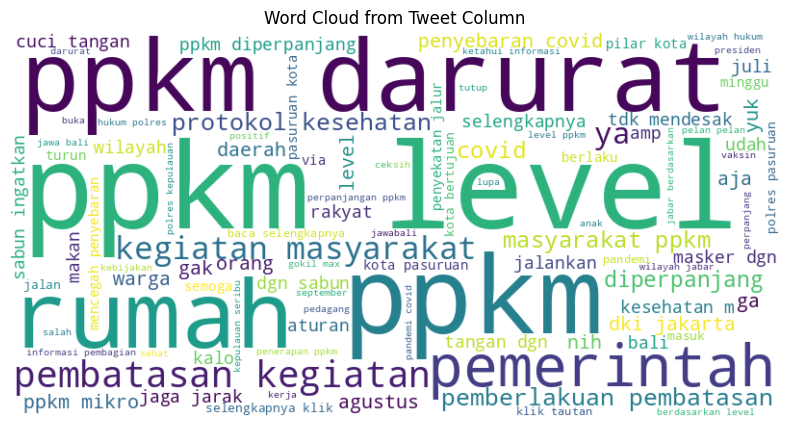

In [ ]:
# Identify the text column
text_column = None
possible_text_columns = ['Tweet']

for col in possible_text_columns:
    if col in df.columns:
        text_column = col
        break

if text_column is None:
    print("Could not find a suitable text column. Please specify the column name containing the text data.")
else:
    print(f"Using column '{text_column}' for text data.")
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].dropna().astype(str))

    # Text preprocessing function
    def preprocess_text(text):
        text = text.lower() # Convert to lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
        text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
        text = re.sub(r'#\w+', '', text) # Remove hashtags
        text = re.sub(r'[\d]+', '', text) # Remove numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters
        return text

    cleaned_text = preprocess_text(all_text)

    # Get Indonesian stop words
    indonesian_stopwords = stopwords.words('indonesian')

    # Add common English stop words as well, if needed, or other domain-specific words
    custom_stopwords = set(STOPWORDS) # English stopwords
    custom_stopwords.update(indonesian_stopwords)
    custom_stopwords.update(['rupiah', 'indonesia', 'nya', 'yg', 'ini', 'itu', 'di', 'dan', 'yang', 'dengan'])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords,
        min_font_size=10
    ).generate(cleaned_text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud from {text_column} Column')
    plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

def preprocess_for_classification(text):
    text = str(text) # Ensure text is string type to avoid errors with non-string entries
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[\d]+', '', text) # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and special characters

    tokens = word_tokenize(text) # Tokenize text
    # Remove stopwords (using the custom_stopwords defined previously)
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet_text'] = df[text_column].dropna().apply(preprocess_for_classification)

print("Text preprocessing completed and 'cleaned_tweet_text' column created.")

Text preprocessing completed and 'cleaned_tweet_text' column created.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['cleaned_tweet_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (18915,)
X_test shape: (4729,)
y_train shape: (18915,)
y_test shape: (4729,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for efficiency

# Fit the vectorizer on X_train and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text data converted to TF-IDF feature vectors.")
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")

# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully.")

Text data converted to TF-IDF feature vectors.
X_train_tfidf shape: (18915, 5000)
X_test_tfidf shape: (4729, 5000)
Logistic Regression model trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8446

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.31      0.43       377
           1       0.87      0.96      0.91      3569
           2       0.73      0.58      0.65       783

    accuracy                           0.84      4729
   macro avg       0.77      0.62      0.66      4729
weighted avg       0.83      0.84      0.83      4729


Confusion Matrix:
[[ 117  205   55]
 [  36 3420  113]
 [  10  316  457]]
